# 15wk-2: 기말고사 – 06/21, 09:00

최규빈  
2024-06-21

<a href="https://colab.research.google.com/github/guebin/PP2024/blob/main/posts/15wk-2-fin.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 0. 공통클래스

`# 캐릭터관련 클래스`

In [2]:
class Base:
    def __init__(self,이름,목표높이):
        self.목표높이 = 목표높이
        self.이름 = 이름
        self.현재높이 = 0
        self.탑완성 = False 
        self.블록쌓는수 = None
        self.블록쌓기성공확률 = None
        self.블록쌓기성공상태 = None
    def __eq__(self,other):
        return self.현재높이 == other.현재높이
    def __gt__(self,other):
        return self.현재높이 > other.현재높이
    def 탑쌓기(self):
        if not self.탑완성:
            if np.random.rand() < self.블록쌓기성공확률:
                self.블록쌓기성공상태 = True
                self.현재높이 = self.현재높이 + self.블록쌓는수
            else: 
                self.블록쌓기성공상태 = False
                self.현재높이 = 0 
    def 완성상태체크(self):
        self.탑완성 = self.현재높이 >= self.목표높이
    def __rshift__(self, other):
        return self.탑완성 and not other.탑완성 
    def __lshift__(self, other):
        return not self.탑완성 and other.탑완성 
    def __repr__(self):
        text = "\n".join([
            f"이름: {self.이름}",
            f"목표높이: {self.목표높이}",
            f"현재높이: {self.현재높이}",
            f"완성상태: {self.탑완성}"])
        return text

In [469]:
class Guebin(Base):
    def __init__(self,이름,목표높이):
        super().__init__(이름,목표높이)
        self.블록쌓는수 = 2 
        self.블록쌓기성공확률 = 0.5 
class Daho(Base):
    def __init__(self,이름,목표높이):
        super().__init__(이름,목표높이)
        self.블록쌓는수 = 1
        self.블록쌓기성공확률 = 1.0 
class GuebinAttack(Guebin):
    def __init__(self,이름,목표높이):
        super().__init__(이름,목표높이)
        self.공격성공률 = 0.6 
    def 공격하기(self,other):
        if np.random.rand() < self.공격성공률:
            other.현재높이 = 0
class DahoCrying(Daho):
    def __init__(self,이름,목표높이,울확률=0.1):
        super().__init__(이름,목표높이)
        self.울확률 = 울확률
        self.울음상태 = False 
    def 울기(self):
        if np.random.rand() < self.울확률:
            self.울음상태 = True
class GuebinTraining(Guebin):
    def 수련하기(self):
        self.블록쌓기성공확률 = min(self.블록쌓기성공확률 + 0.05,1)
class DahoStill(Daho):
    def __init__(self,이름,목표높이,애교성공률=0.5):
        super().__init__(이름,목표높이)
        self.애교성공률 = 애교성공률
    def 애교부리기(self,other):
        if np.random.rand() < self.애교성공률:
            self.현재높이 = self.현재높이 + other.블록쌓는수
            other.현재높이 = other.현재높이 - other.블록쌓는수

`#`

`# 시뮬레이터 관련 클래스`

In [470]:
class BaseSimulator:
    def __init__(self,규빈,다호,최대라운드=None):
        self.규빈 = 규빈
        self.다호 = 다호
        self.규빈의탑높이들 = []
        self.다호의탑높이들 = []
        self.결과 = None 
        self.최대라운드 = 최대라운드
        self.라운드 = 0 
    def 경험저장(self):
        self.규빈의탑높이들.append(self.규빈.현재높이)
        self.다호의탑높이들.append(self.다호.현재높이)
    def 히스토리(self):
        text = [
            f"규빈의탑높이들: {self.규빈의탑높이들}",
            f"다호의탑높이들: {self.다호의탑높이들}",
            f"최종라운드: {self.라운드}",
            f"결과: {self.결과}"
        ]
        print("\n".join(text))
    def 결과시각화(self):
        plt.plot(self.규빈의탑높이들,'--o',label=self.규빈.이름)
        plt.plot(self.다호의탑높이들,'--o',label=self.다호.이름)
        plt.legend()        
    def __iter__(self):
        return self 
    def __next__(self):
        if self.규빈 >> self.다호: ## 규빈의 승리
            self.결과 = "규빈승"
            raise(StopIteration)
        elif self.규빈 << self.다호: ## 다호의 승리 
            self.결과 = "다호승"
            raise(StopIteration)
        else: ## 무승부 
            self.양쪽모두완성 = self.규빈.탑완성 and self.다호.탑완성 
            self.양쪽모두미완성 = not self.규빈.탑완성 and not self.다호.탑완성 
            self.라운드초과 = self.최대라운드 is not None and self.라운드 >= self.최대라운드
            if self.양쪽모두완성:
                self.결과 = "무승부(모두성공)"
                raise(StopIteration)
            elif self.양쪽모두미완성 and self.라운드초과:
                self.결과 = "무승부(모두실패)"
                raise(StopIteration)
            else:
                pass

`#`

# 1. 공든 탑 쌓기 I – 50점

> 문항당 10점

> 모든 문항은 문항의 뜻에 맞는 `규빈`, `다호` 클래스를 선언하여 풀 것.
> 클래스를 사용하지 않을 경우 (예를들어 중간고사 답안을 그대로 복붙하여
> 제출하는 경우) 감점있음.

규빈과 다호가 블록을 사용하여 탑을 쌓는다. (규빈이 먼저 쌓음) 규빈은 한
번에 2개의 블록을 사용하여 탑을 쌓지만, 실수로 탑을 무너뜨릴 확률이
50%이다. 한 번 무너진 탑은 다시 처음부터 쌓아야 한다. 다호는 한 번에
1개의 블록을 사용하여 신중하게 탑을 쌓는다. 다호는 천천히 탑을 쌓지만
실수로 탑을 무너뜨리지 않는다.

`(1)` 규빈과 다호가 10층 높이의 탑을 먼저 쌓는 내기를 하였다고 하자.
탑을 쌓을수 있는 기회는 10회 (=10-rounds) 준다. 승리조건은 각 라운드가
끝난 이후 정산하며 양쪽이 같은 round에 탑을 완성 시킨 경우나 양쪽이
제한횟수내에 모두 탑을 쌓지 못한경우면 무승부로 처리한다. 이 내기는 누가
유리한가? 시뮬레이션을 통하여 근거를 설명하라.

`(클래스사용소개)`

In [471]:
규빈1 = Guebin(이름="Guebin1",목표높이=10)
다호1 = Daho(이름="Daho1",목표높이=10)

In [472]:
class Simulator1(BaseSimulator):
    def 라운드진행(self):
        self.다호.탑쌓기()
        self.규빈.탑쌓기()
        self.규빈.완성상태체크() 
        self.다호.완성상태체크()  

In [473]:
simulator = Simulator1(규빈1,다호1,최대라운드=10)

In [474]:
for _ in simulator:
    simulator.라운드진행()
    simulator.경험저장()
    simulator.라운드 = simulator.라운드 + 1 

In [475]:
simulator.히스토리()

규빈의탑높이들: [0, 2, 0, 0, 0, 2, 0, 0, 0, 0]
다호의탑높이들: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
최종라운드: 10
결과: 다호승

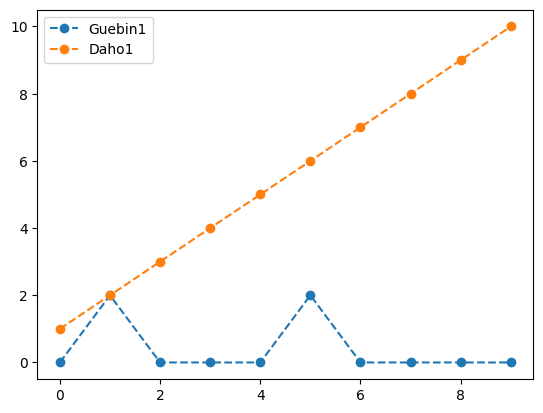

In [476]:
simulator.결과시각화()

`(풀이)`

In [477]:
simulator_list = [Simulator1(Guebin(f"Guebin{i}",10),Daho(f"Daho{i}",10),최대라운드=10) for i in range(100000)] 

In [478]:
for simulator in simulator_list:
    for _ in simulator:
        simulator.라운드진행()
        simulator.경험저장()
        simulator.라운드 = simulator.라운드 + 1 

In [479]:
results = [s.결과 for s in simulator_list]
{s:results.count(s) for s in set(results)}

`(결과분석)`

**첫번째 시뮬레이션 결과탐색**

In [480]:
results[0]

In [481]:
simulator_list[0].히스토리()

규빈의탑높이들: [2, 0, 2, 4, 6, 0, 0, 0, 0, 2]
다호의탑높이들: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
최종라운드: 10
결과: 다호승

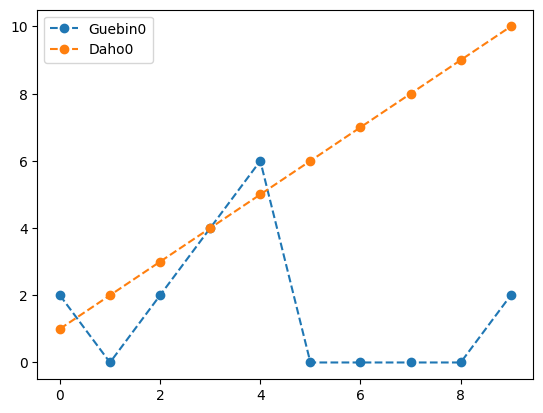

In [482]:
simulator_list[0].결과시각화()

**두번째 시뮬레이션 결과탐색**

In [483]:
results[1]

In [484]:
simulator_list[1].히스토리()

규빈의탑높이들: [2, 4, 6, 8, 10]
다호의탑높이들: [1, 2, 3, 4, 5]
최종라운드: 5
결과: 규빈승

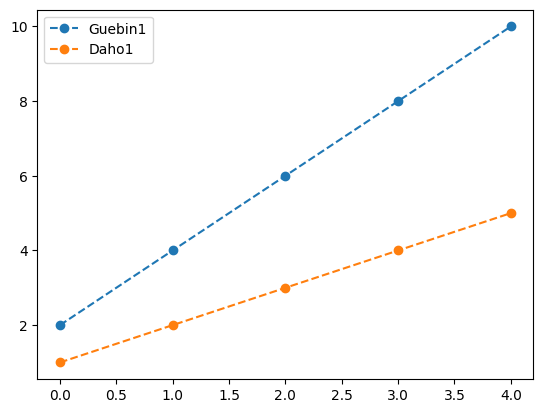

In [485]:
simulator_list[1].결과시각화()

`(2)` 규빈은 게임을 반복하다가 본인이 불리하다는 사실을 알았다. 규빈은
다호의 탑을 관찰하며, 다호의 탑이 5층 이상인 경우 다호의 탑을 공격하기로
결정했다. 공격 성공률은 60% 이며 공격이 성공시 다호의 탑은 모두
무너진다. (단, 공격시 규빈은 탑을 쌓을 수 없다) 규빈과 다호에게 탑을
쌓거나 상대방의 탑을 공격할 기회를 20회 준다. 즉 20-rounds 동안 게임을
진행한다. 누가 유리한가? 시뮬레이션을 통하여 근거를 설명하라.

`(풀이)`

In [486]:
class Simulator2(BaseSimulator):
    def 라운드진행(self):
        if self.다호.현재높이 >= 5: 
            self.규빈.공격하기(self.다호)
        else: 
            self.규빈.탑쌓기()        
        self.다호.탑쌓기()            
        self.규빈.완성상태체크() 
        self.다호.완성상태체크()      

In [487]:
simulator_list = [Simulator2(GuebinAttack(f"Guebin{i}",10),Daho(f"Daho{i}",10),최대라운드=20) for i in range(10000)] 

In [488]:
for simulator in simulator_list:
    for _ in simulator:
        simulator.라운드진행()
        simulator.경험저장()
        simulator.라운드 = simulator.라운드 + 1 

In [489]:
results = [s.결과 for s in simulator_list]
{s:results.count(s) for s in set(results)}

`(3)` 다호는 규빈의 공격으로 공든탑이 무너지자 참을수가 없어져 결국
울음을 터뜨렸다. “울음”의 효과는 아래와 같다.

-   현재 탑의 높이와 상관없이 다호의 승리 (규빈은 다호가 울면 전의를
    상실하고 게임을 포기한다)

“울음”은 다호의 탑이 무너진 경우 $p_{으앙}$ 의 확률로 발생한다. 다호가
유리해지기 시작하는 $p_{으앙}$ 는 얼마인가? (소수점 첫번째 자리까지의
정확도만 요구함)

> 울음이벤트의 랜덤발생을 제외하고 전체 게임 상황은 (2)의 게임이
> 유지된다. 즉 게임은 20-rounds 동안 10층높이의 탑을 쌓는 규칙으로
> 진행되며 규빈은 다호의탑이 5층이상인 경우 다호의 탑을 공격한다.
> 공격성공률은 60%이며 공격이 성공시 다호의 탑은 모두 무너진다.

`(4)` 다호가 울어버리자 규빈은 공격을 하지 않고 수련을 반복하여 다호를
이기기로 결심하였다. 규빈은 매회 탑을 쌓는 연습을 몰래하였으며 연습을
통해 탑을 쌓을 확률을 5%씩 증가시켰다. (단 탑을 쌓을 확률은 1을 넘지
않는다) 예를들면 아래의 표와 같다.

| round | 플레이어 |   행동   |  탑쌓기성공확률   |           상태            | 탑의높이 |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|   1   |   규빈   |  탑쌓기  |       0.50        |        탑쌓기성공         |    2     |
|   1   |   규빈   | 수련하기 | (0.50 $\to$) 0.55 | 수련결과 탑쌓는 확률 상승 |    2     |
|   1   |   다호   |  탑쌓기  |        1.0        |        탑쌓기성공         |    1     |
|   2   |   규빈   |  탑쌓기  |       0.55        |        탑쌓기성공         |    4     |
|   2   |   규빈   | 수련하기 | (0.55 $\to$) 0.60 | 수련결과 탑쌓는 확률 상승 |    4     |
|   2   |   다호   |  탑쌓기  |        1.0        |        탑쌓기성공         |    2     |

먼저 $n$ 층 높이의 탑을 내기를 한다고 하자. 규빈이 유리해지기 시작하는
$n$ 은 얼마인가?

`(5)` 다호는 수련을 통해 매회 블럭쌓는 실력이 향상되는 규빈과 (4에서
구한) $n$층 높이의 탑을 쌓는 내기를 반복하였다. 반복되는 내기에서 다호는
본인이 조금 불리한것 같다는 생각을 하였다. 그래서 규빈이 탑을 쌓는것을
지켜보다가 규빈이 탑을 성공할때마다 애교를 부리기로 결심했다.

-   상황1: 규빈이 2개 블럭 쌓기에 성공하는 것을 관찰한다. $\to$ “그 블럭
    나한테 주면 안돼?” 라고 애교를 부린다. $\to$ 애교가 성공하면 다호의
    탑에 2개의 블록이 추가된다. 애교가 실패하면 규빈탑에 그대로 2개의
    블럭이 추가되고, 다호의 탑에는 블럭이 추가되지 않는다.
-   상황2: 규빈이 2개 블럭 쌓기에 실패하는 것을 관찰한다. $\to$ 애교를
    부릴 이유가 없어졌다. 묵묵히 하나의 블럭을 차분하게 쌓는다.

따라서 발생가능한 모든 경우의 수는 아래와 같다.

| 규빈이 탑쌓기 성공 | 애교시도 | 애교성공 | 규빈탑높이 | 다호탑높이 |
|:------------------:|:--------:|:--------:|:----------:|:----------:|
|        True        |   True   |   True   |     +0     |     +2     |
|        True        |   True   |  False   |     +2     |     +0     |
|       False        |  False   |   None   |     +0     |     +1     |

아래는 5층 높이의 탑을 먼저 쌓는 조건을 round 4까지만 진행한다고 할때
발생가능한 게임양상의 예시이다.

`# 경우1` – 다호가 승리

| round | 플레이어 |         행동          |    상태    | 탑의높이들 (수련규빈, 애교다호) |         승리조건         |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|   1   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |               2,0               | 양쪽 모두 승리조건 만족X |
|   1   |   다호   |         애교          |  애교성공  |               0,2               | 양팀 모두 승리조건 만족X |
|   2   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기실패 |               0,2               | 양쪽 모두 승리조건 만족X |
|   2   |   다호   | 탑쌓기(애교대상없음)  | 탑쌓기성공 |               0,3               | 양쪽 모두 승리조건 만족X |
|   3   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |               2,3               | 양쪽 모두 승리조건 만족X |
|   3   |   다호   |         애교          |  애교성공  |               0,5               |   다호가 승리조건 만족   |

**다호의 승리**

`#`

`# 경우2` – 규빈이 승리하는듯 보였지만 결국 다호가 승리

| round | 플레이어 |         행동          |    상태    | 탑의높이들 (수련규빈, 애교다호) |         승리조건         |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|   1   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |               2,0               | 양쪽 모두 승리조건 만족X |
|   1   |   다호   |         애교          |  애교실패  |               2,0               | 양팀 모두 승리조건 만족X |
|   2   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |               4,0               | 양쪽 모두 승리조건 만족X |
|   2   |   다호   |         애교          |  애교성공  |               2,2               | 양쪽 모두 승리조건 만족X |
|   3   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |               4,2               | 양쪽 모두 승리조건 만족X |
|   3   |   다호   |         애교          |  애교성공  |               2,4               | 양쪽 모두 승리조건 만족X |
|   4   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |               4,4               | 양쪽 모두 승리조건 만족X |
|   4   |   다호   |         애교          |  애교실패  |               4,4               | 양쪽 모두 승리조건 만족X |
|   5   |   규빈   | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |               6,4               |   규빈이 승리조건 만족   |
|   5   |   다호   |         애교          |  애교성공  |               4,6               |   다호가 승리조건 만족   |

**최종적으로 다호의 승리**

`#`

라운드 제한없이 $n$층의 높이를 먼저 쌓는 내기를 할때, 애교의 성공확률
$p_{아잉}$ 가 얼마 이상이면 다호의 승률이 70% 이상이 되는가? (Note:
$p_{아잉}=1$ 이면 다호의 승률은 100%이다. 즉 규빈은 이길 수 없다.)

# 2. 공든 탑 쌓기 II – 100점

> `(1)` 20점, `(2)` 80점임. `(1)`은 부분점수 없으며 `(2)`는 부분점수
> 있음.

하니는 규빈과 다호가 탑을 쌓는 과정을 유심히 바라보다가 게임을 하나
만들었다. 게임에는 다음과 같은 4명의 캐릭터가 등장한다.

-   공격규빈: 공든 탑 쌓기 I-(2)에서의 규빈
-   울보다호: 공든 탑 쌓기 I-(3)에서의 다호 // $p_{으앙}$의 확률로 울음
-   수련규빈: 공든 탑 쌓기 I-(4)에서의 규빈
-   애교다호: 공든 탑 쌓기 I-(5)에서의 다호 // 애교는 $p_{아잉}$의
    확률로 성공한다.

4명의 캐릭터중 \[수련규빈, 공격규빈\] 이 한팀으로, \[울보다호,
애교다호\] 가 한팀으로 구성되었다. 게임은 수련규빈, 울보다호, 공격규빈,
애교다호 순서로 번갈아가며 탑을 쌓는 방식으로 진행한다. 수련규빈,
울보다호, 공격규빈, 애교다호의 탑중 가장 빨리 탑을 완성시킨 캐릭터가
포함된 팀이 최종승리한다. 승리조건은 각 라운드가 끝난 이후 정산하며
양팀이 같은 round에 탑을 완성 시킨 경우나 양팀이 제한횟수내에 모두 탑을
쌓지 못한경우면 팀의 탑높이를 합산하여 승자를 결정한다. 합산점수도
동일하다면 무승부 처리한다. 규칙의 세부적인 내용은 아래와 같다.

1.  공격규빈과 애교다호는 1라운드에는 탑을 공격하거나 뺏지 않으며
    2라운드부터 상대팀 중 한명의 탑을 무너뜨리거나 뺏을 수 있다.
2.  울보다호가 울 경우 게임은 즉시 중지되며 다호팀이 승리한다.
3.  팀의 탑의 높이를 합산할시, 최종목표타워 높이보다 높은 블록은
    합산하지 않는다. (즉 5층을 먼저 쌓는 내기라면 6층을 쌓더라도 5층으로
    계산한다.)
4.  애교다호는 해당 라운드에 탑쌓기에 성공한 플레이어에게만 애교를
    사용할 수 있다. 탑쌓기에 성공한 플레이어가 2명이면 둘중하나에게만
    애교를 사용할 수 있다. (애교를 거는 대상은 팀 전략에 따라 달라진다.
    랜덤으로 애교를 건다든가? 탑을 높이 쌓은 쪽에게 애교를
    시전한다든가?)

5층 높이의 탑을 먼저 쌓는 조건을 round4까지만 진행한다고 할때 발생가능한
게임예시는 아래와 같다.

`# 경우1` – 수련규빈이 먼저 탑을 완성하며 규빈팀 최종승리

| round | 플레이어 |         행동          |    상태    | 탑의높이들 (\[수련규빈,공격규빈\],\[울보다호,애교다호\]) |         승리조건         |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|   1   | 수련규빈 | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |                     \[2,0\], \[0,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 울보다호 |        탑쌓기         | 탑쌓기성공 |                     \[2,0\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 공격규빈 |        탑쌓기         | 탑쌓기실패 |                     \[2,0\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 애교다호 |        탑쌓기         | 탑쌓기성공 |                     \[2,0\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |          \-           |     \-     |                            \-                            |                          |
|   2   | 수련규빈 | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |                     \[4,0\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 울보다호 |        탑쌓기         | 탑쌓기성공 |                     \[4,0\], \[2,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 공격규빈 |        탑쌓기         | 탑쌓기성공 |                     \[4,2\], \[2,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 애교다호 |   수련규빈에게 애교   |  애교실패  |                     \[4,2\], \[2,1\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |          \-           |     \-     |                            \-                            |                          |
|   3   | 수련규빈 | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |                     \[6,2\], \[2,1\]                     |   규빈팀 승리조건 만족   |
|   3   | 울보다호 |        탑쌓기         | 탑쌓기성공 |                     \[6,2\], \[3,1\]                     |   규빈팀 승리조건 만족   |
|   3   | 공격규빈 |        탑쌓기         | 탑쌓기성공 |                     \[6,4\], \[3,1\]                     |   규빈팀 승리조건 만족   |
|   3   | 애교다호 |   수련규빈에게 애교   |  애교실패  |                     \[6,4\], \[3,1\]                     |   규빈팀 승리조건 만족   |

**수련규빈이 6층을 완성하여 목표치 5층보다 높으므로 규빈팀 최종송리**

`#`

`# 경우2` – 애교다호가 수련규빈의 완성을 가로채며 다호팀 최종승리

| round | 플레이어 |         행동          |        상태        | 탑의높이들 (\[수련규빈,공격규빈\],\[울보다호,애교다호\]) |         승리조건         |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|   1   | 수련규빈 | 탑쌓기 $\to$ 수련하기 |     탑쌓기성공     |                     \[2,0\], \[0,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 울보다호 |        탑쌓기         |     탑쌓기성공     |                     \[2,0\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 공격규빈 |        탑쌓기         |     탑쌓기실패     |                     \[2,0\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 애교다호 |        탑쌓기         |     탑쌓기성공     |                     \[2,0\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |          \-           |         \-         |                            \-                            |                          |
|   2   | 수련규빈 | 탑쌓기 $\to$ 수련하기 |     탑쌓기성공     |                     \[4,0\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 울보다호 |        탑쌓기         |     탑쌓기성공     |                     \[4,0\], \[2,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 공격규빈 |     울보다호공격      | 공격성공,울음발동X |                     \[4,0\], \[0,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 애교다호 |   수련규빈에게 애교   |      애교성공      |                     \[2,0\], \[0,3\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |          \-           |         \-         |                            \-                            |                          |
|   3   | 수련규빈 | 탑쌓기 $\to$ 수련하기 |     탑쌓기성공     |                     \[4,0\], \[0,3\]                     | 양팀 모두 승리조건 만족X |
|   3   | 울보다호 |        탑쌓기         |     탑쌓기성공     |                     \[4,0\], \[1,3\]                     | 양팀 모두 승리조건 만족X |
|   3   | 공격규빈 |     애교다호공격      |      공격실패      |                     \[4,0\], \[1,3\]                     | 양팀 모두 승리조건 만족X |
|   3   | 애교다호 |   수련규빈에게 애교   |      애교실패      |                     \[4,0\], \[1,3\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |          \-           |         \-         |                            \-                            |                          |
|   4   | 수련규빈 | 탑쌓기 $\to$ 수련하기 |     탑쌓기성공     |                     \[6,0\], \[1,3\]                     |   규빈팀 승리조건 만족   |
|   4   | 울보다호 |        탑쌓기         |     탑쌓기성공     |                     \[6,0\], \[2,3\]                     |   규빈팀 승리조건 만족   |
|   4   | 공격규빈 |     애교다호공격      |      공격실패      |                     \[6,0\], \[2,3\]                     |   규빈팀 승리조건 만족   |
|   4   | 애교다호 |   수련규빈에게 애교   |      애교성공      |                     \[4,0\], \[2,5\]                     |   다호팀 승리조건 만족   |

**수련규빈의 탑을 애교다호가 스틸하며 4라운드에서 다호팀이 최종승리**

`#`

`# 경우3` – 울음이 발동되며 다호팀 승리

| round | 플레이어 |            행동             |          상태           | 탑의높이들 (\[수련규빈,공격규빈\],\[울보다호,애교다호\]) |         승리조건         |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|   1   | 수련규빈 |    탑쌓기 $\to$ 수련하기    |       탑쌓기성공        |                     \[2,0\], \[0,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 울보다호 |           탑쌓기            |       탑쌓기성공        |                     \[2,0\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 공격규빈 |           탑쌓기            |       탑쌓기실패        |                     \[2,0\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 애교다호 |           탑쌓기            |       탑쌓기성공        |                     \[2,0\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |             \-              |           \-            |                            \-                            |                          |
|   2   | 수련규빈 |    탑쌓기 $\to$ 수련하기    |       탑쌓기성공        |                     \[4,0\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 울보다호 |           탑쌓기            |       탑쌓기성공        |                     \[4,0\], \[2,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 공격규빈 |        울보다호공격         |   공격성공,울음발동X    |                     \[4,0\], \[0,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 애교다호 |      수련규빈에게 애교      |        애교성공         |                     \[2,0\], \[0,3\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |             \-              |           \-            |                            \-                            |                          |
|   3   | 수련규빈 |    탑쌓기 $\to$ 수련하기    |       탑쌓기실패        |                     \[0,0\], \[0,3\]                     | 양팀 모두 승리조건 만족X |
|   3   | 울보다호 |           탑쌓기            |       탑쌓기성공        |                     \[0,0\], \[1,3\]                     | 양팀 모두 승리조건 만족X |
|   3   | 공격규빈 |        애교다호공격         |        공격실패         |                     \[0,0\], \[1,3\]                     | 양팀 모두 승리조건 만족X |
|   3   | 애교다호 | 탑쌓기(**애교대상없음**)[1] |       탑쌓기성공        |                     \[0,0\], \[1,4\]                     | 양팀 모두 승리조건 만족X |
|  \-   |    \-    |             \-              |           \-            |                            \-                            |                          |
|   4   | 수련규빈 |    탑쌓기 $\to$ 수련하기    |       탑쌓기성공        |                     \[2,0\], \[1,4\]                     | 양팀 모두 승리조건 만족X |
|   4   | 울보다호 |           탑쌓기            |       탑쌓기성공        |                     \[2,0\], \[2,4\]                     | 양팀 모두 승리조건 만족X |
|   4   | 공격규빈 |        울보다호공격         | 공격성공 $\to$ 울음발동 |                     \[2,0\], \[0,4\]                     | 양팀 모두 승리조건 만족X |

**울음이 발동되며 경기종료: 다호팀 승리**

`#`

`# 경우4` – 수련규빈과 애교다호가 동시에 성공하며 점수합산으로 승자결정,
점수합산 결과 다호팀 승리.

| round | 플레이어 |         행동          |    상태    | 탑의높이들 (\[수련규빈,공격규빈\],\[울보다호,애교다호\]) |         승리조건         |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|   1   | 수련규빈 | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |                     \[2,0\], \[0,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 울보다호 |        탑쌓기         | 탑쌓기성공 |                     \[2,0\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 공격규빈 |        탑쌓기         | 탑쌓기성공 |                     \[2,2\], \[1,0\]                     | 양팀 모두 승리조건 만족X |
|   1   | 애교다호 |        탑쌓기         | 탑쌓기성공 |                     \[2,2\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 수련규빈 | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |                     \[4,2\], \[1,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 울보다호 |        탑쌓기         | 탑쌓기성공 |                     \[4,2\], \[2,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 공격규빈 |        탑쌓기         | 탑쌓기성공 |                     \[4,4\], \[2,1\]                     | 양팀 모두 승리조건 만족X |
|   2   | 애교다호 |   공격규빈에게 애교   |  애교성공  |                     \[4,2\], \[2,3\]                     | 양팀 모두 승리조건 만족X |
|   3   | 수련규빈 | 탑쌓기 $\to$ 수련하기 | 탑쌓기성공 |                     \[6,2\], \[2,3\]                     |   규빈팀 승리조건 만족   |
|   3   | 울보다호 |        탑쌓기         | 탑쌓기성공 |                     \[6,2\], \[3,3\]                     |   규빈팀 승리조건 만족   |
|   3   | 공격규빈 |        탑쌓기         | 탑쌓기성공 |                     \[6,4\], \[3,3\]                     |   규빈팀 승리조건 만족   |
|   3   | 애교다호 |   공격규빈에게 애교   | 탑쌓기성공 |                     \[6,2\], \[3,5\]                     | 양팀 모두 승리조건 만족  |

**양팀 모두 승리 조건 만족, `규빈팀 합산 = (6-1)+2 = 7`,
`다호팀 합산 = 3+5 = 8` 이므로 다호팀 승리**

`#`

`(1)` 공격규빈은 2라운드부터 항상 울보다호를 공격하는 전략을 선택한다고
하자. (따라서 애교다호는 공격규빈에게 애교를 부리진 않는다[2]) 20라운드
동안 20층높이의 탑을 먼저 쌓는 내기를 할때 유리한 팀은 어느쪽인가?
시뮬레이션을 바탕으로 근거를 설명하라. – 20점

`(2)` 공격규빈은 아래와 같은 전략으로 공격한다고 가정하자.

-   상대편의 탑이 15층 이상일 경우만 그 탑을 공격한다.
-   애교다호와 울보다호의 탑이 모두 15층 이상이라면 애교다호를 공격한다.

또한 애교다호는 아래의 전략을 사용한다.

-   애교다호는 해당 라운드에서 탑쌓기에 성공한 플레이어에게 애교를
    사용한다.
-   상대편에 탑쌓기를 성공한 플레이어가 2명이면 둘중 탑을 높이 쌓은
    쪽에게 애교를 사용한다. (둘의 탑높이가 같다면 수련규빈에게 애교를
    사용한다)

20라운드 동안 20층높이의 탑을 먼저 쌓는 내기를 할때 유리한 팀은
어느쪽인가? 시뮬레이션을 바탕으로 근거를 설명하라. – 80점

# 3. 14wk-2 강의내용 – 50점

> 문항당 10점

`(1)` 아래의 역할을 하는 함수 `myprod`를 선언하라.

[1] 라운드3에서 탑쌓기에 성공한 규빈이 없으므로 뺏을게 없다

[2] 공격규빈은 탑을 안쌓으니까요

In [11]:
myprod(1,2)

1x2=2

In [12]:
myprod(1,2,3)

1x2x3=6

In [10]:
myprod(1,2,3,4)

1x2x3x4=24

**hint**: 아래의 코드를 관찰하라.

In [14]:
np.prod([1,2])

In [15]:
np.prod([1,2,3])

In [16]:
np.prod([1,2,3,4])

`(2)` 아래와 같은 함수를 고려하자.

In [20]:
def mysub(a,b):
    return a-b    

아래는 이 함수를 사용한 예시이다.

In [21]:
mysub(1.2,-0.5)

이 함수는 2개의 `float`을 입력으로 받으면 하나의 `float`을 출력하게끔
설계된 함수이다. 타입힌트를 이용하여 설계의도와 일치하도록 mysub 함수를
재정의하라.

`(3)` 아래와 같이 함수의 입력으로 전달된 인자가 위치인자인지
키워드인자인지 정리하여 출력해주는 데코레이터 `@deco`를 설계하라.

In [57]:
@deco 
def mysub(a,b,verbose=False):
    if verbose: 
        print(f"{a}+{b}={a+b}")
    return a-b

In [58]:
mysub(1,2)

위치인자: (1, 2)
키워드인자: {}

In [59]:
mysub(1,2,verbose=False)

위치인자: (1, 2)
키워드인자: {'verbose': False}

`(4)` 제곱수중에서 12로 나누어 떨어지는 수가 무엇인지 알고싶다.
제너레이터를 이용하여 이러한수를 순서대로 50개 찾아라. 즉 아래의 코드가
실행되도록 하는 적당한 `make_gen`을 설계하라.

In [61]:
generator = make_gen()

In [62]:
lst = []
for _ in range(50):
    lst.append(next(generator))

In [65]:
lst[-1]

**힌트**:
<https://guebin.github.io/PP2024/posts/03wk-2.html#b.-예비학습> 여기를
참고해보시며 코드를 비교해보세요

`(5)` 아래는 `Person` 클래스와 이를 상속받은 `Employee` 클래스이다.

In [51]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def introduce(self):
        print(f"제 이름은 {self.name}이고, 나이는 {self.age}살입니다.")
    def __repr__(self):
        text = "\n".join([f"이름:{self.name}",f"나이:{self.age}"])
        return text
class Korean(Person):
    def __init__(self, name, age):
        super().__init__(name, age)
        self.nationality = "한국"
    def introduce(self):
        super().introduce()
        print(f"저는 한국인입니다.")
    def __repr__(self):
        text = super().__repr__()
        return text + f"\n국적:{self.nationality}"

In [55]:
보람 = Korean(name="김보람",age=20)

In [56]:
보람.introduce()

제 이름은 김보람이고, 나이는 20살입니다.
저는 한국인입니다.

In [57]:
보람

아래의 코드에서 `???`를 적당히 완성하여 예시 1~2 의 동작을 하도록 하라.

``` python
class NaturalizedKorean(Korean):
    def __init__(self, name, age, former_nationality):
        super().__init__(name,age)
        self.former_nationality = former_nationality
    def introduce(self):
        super(???,???).introduce()
        print(f"저는 귀화한국인(이전국적={self.former_nationality})입니다.")
```

`# 예시1`

In [61]:
강남 = NaturalizedKorean(name="강남",age=37,former_nationality="일본")
강남

In [62]:
강남.introduce()

제 이름은 강남이고, 나이는 37살입니다.
저는 귀화한국인(이전국적=일본)입니다.

`#`

`# 예시2`

In [63]:
예서 = NaturalizedKorean(name="당예서",age=43,former_nationality="중국")
예서

In [64]:
예서.introduce()

제 이름은 당예서이고, 나이는 43살입니다.
저는 귀화한국인(이전국적=중국)입니다.

`#`